In [1]:
import os
import sys
import pyspeckit
import matplotlib.pyplot as plt

# since ammonia.py is not setup as a part of the package at the moment, insert the path for import 
sys.path.insert(0,'../models')
import ammonia

### Load the (1,1) and (2,2) cube

In [2]:
cubeDir = "{}/data".format(os.getcwd())
fname = "{}/nh3_11_cubeB.fits".format(cubeDir)

name11 = "{}/nh3_11_cubeB.fits".format(cubeDir)
name22 = "{}/nh3_22_cubeB.fits".format(cubeDir)

cube11 = pyspeckit.Cube(name11)
cube22 = pyspeckit.Cube(name22)
cubes = pyspeckit.CubeStack([cube11,cube22], velocity_convention='radio')

xarr11 = cube11.xarr
xarr22 = cube22.xarr

INFO: Creating Cube Stack [pyspeckit.cubes.SpectralCube]
INFO: Concatenating data [pyspeckit.cubes.SpectralCube]


### Convert the cube's unit (for plotting purposes)

In [3]:
xarr11 = xarr11.as_unit('km/s', velocity_convention='radio')
xarr22 = xarr22.as_unit('km/s', velocity_convention='radio')

### Make an ammonia (1,1) model

In [4]:
# trot, tex, ntot, width, xoff_v, fortho
parameters = [11.0, 9.3, 12.5, 0.1, 8, 0,
                  12., 7.3, 12.1, 0.3, 7.5, 0]
mod11 = ammonia.ammonia_multi_v(xarr11, 2, *parameters)
mod22 = ammonia.ammonia_multi_v(xarr22, 2, *parameters)

### Plot the model

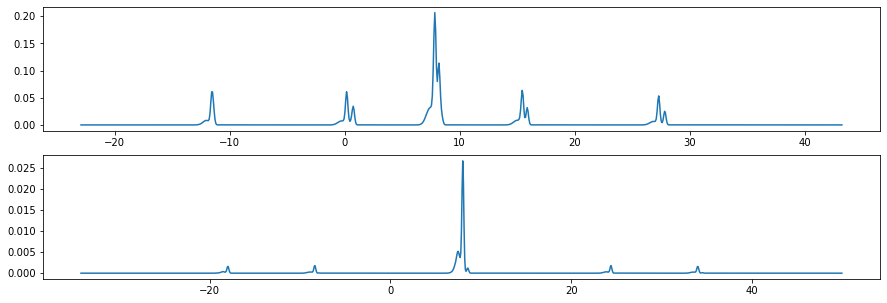

In [5]:
fig, axs = plt.subplots(2,1,figsize = (15,5))
axs[0].plot(xarr11, mod11)
axs[1].plot(xarr22, mod22)

### Fit the model using pyspeckit 

In [6]:
sepc = cubes.get_spectrum(1,1)

fitter = ammonia.nh3_multi_v_model_generator(n_comp = 2)
sepc.specfit.Registry.add_fitter('nh3_multi_v', fitter, fitter.npars)

guesses = [11.0, 8, 12.5, 0.1, 8, 0,
           12.0, 7.3, 12.1, 0.3, 7.8, 0]

sepc.specfit(fittype='nh3_multi_v', guesses=guesses)

INFO: Left region selection unchanged.  xminpix, xmaxpix: 0,2080 [pyspeckit.spectrum.interactive]


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


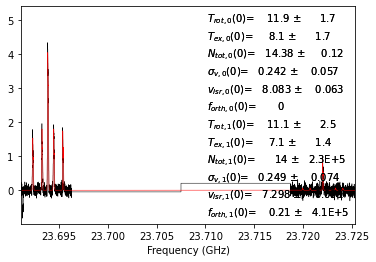

In [7]:
sepc.plotter()
sepc.specfit.plot_fit()
#plt.xlim(23.691, 23.696)